# Driver Laptimes Scatterplot

Plot a driver's lap times in a race, with color coding for the compounds.


In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

Load the race session.



In [2]:
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v2.2.9]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARNING 	Driver 243: Position data is incomplete!
api            INFO 	Fetching

Get all the laps for a single driver.
Filter out slow laps as they distort the graph axis.



In [3]:
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

Make the scattterplot using lap number as x-axis and lap time as y-axis.
Marker colors correspond to the compounds used.
Note: as LapTime is represented by timedelta, calling setup_mpl earlier
is required.



AttributeError: module 'fastf1.plotting' has no attribute 'COMPOUND_COLORS'

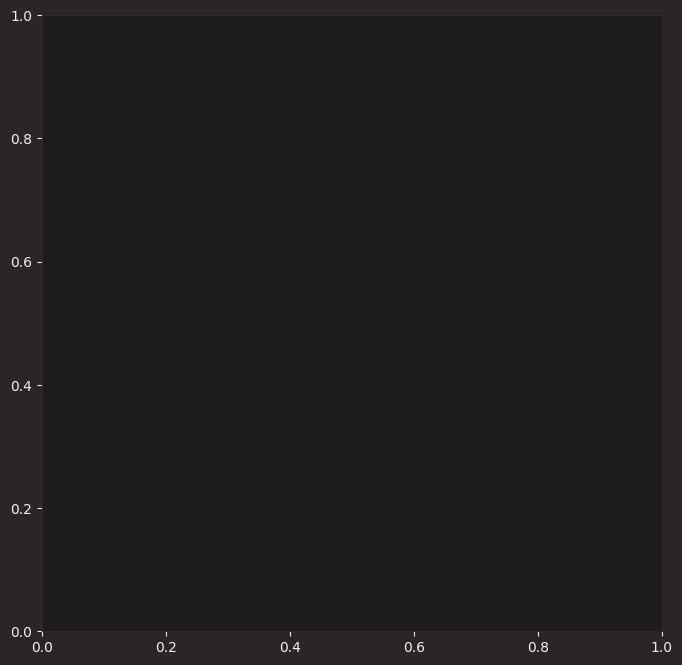

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

Make the plot more aesthetic.



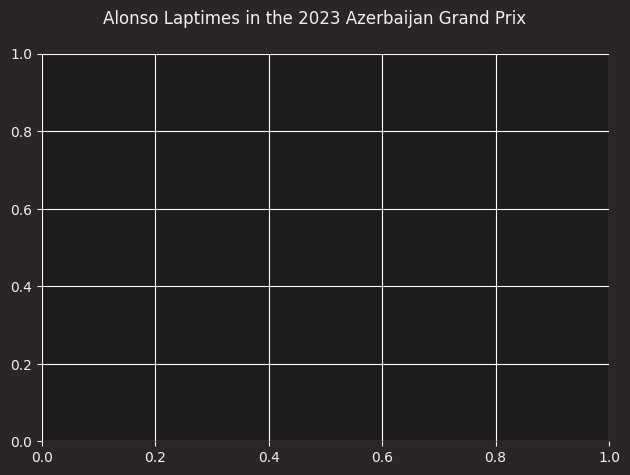

In [5]:
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()